#  Unemployment Analysis in India
### A Data Analysis Study on Unemployment Trends and the Impact of Covid-19

**Objective:**
This project analyzes unemployment rate data in India to understand trends over time, examine the impact of Covid-19, identify regional and seasonal patterns, and provide insights that can help inform economic and social policies.

##  Dataset Description

- **Source:** Kaggle – Unemployment in India
- **Time Period:** 2019 to 2020
- **Data Type:** Monthly, Region-wise
- **Key Attributes:**
  - Region
  - Date
  - Estimated Unemployment Rate (%)
  - Estimated Employed
  - Labour Participation Rate (%)
  - Area (Urban / Rural)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


##  Data Overview

In this step, we examine the structure of the dataset, including column names, data types, and the presence of missing values.


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    str    
 1    Date                                     740 non-null    str    
 2    Frequency                                740 non-null    str    
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    str    
dtypes: float64(3), str(4)
memory usage: 42.1 KB


##  Data Cleaning

The dataset contains extra spaces in column names, missing values, and date values stored as strings.  
These issues are addressed to ensure accurate analysis.


In [8]:
df.columns = df.columns.str.strip()
df['Date'] = df['Date'].astype(str).str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation'
}, inplace=True)

##  Overall Unemployment Trend

This section visualizes the overall unemployment rate trend in India from 2019 to 2020.


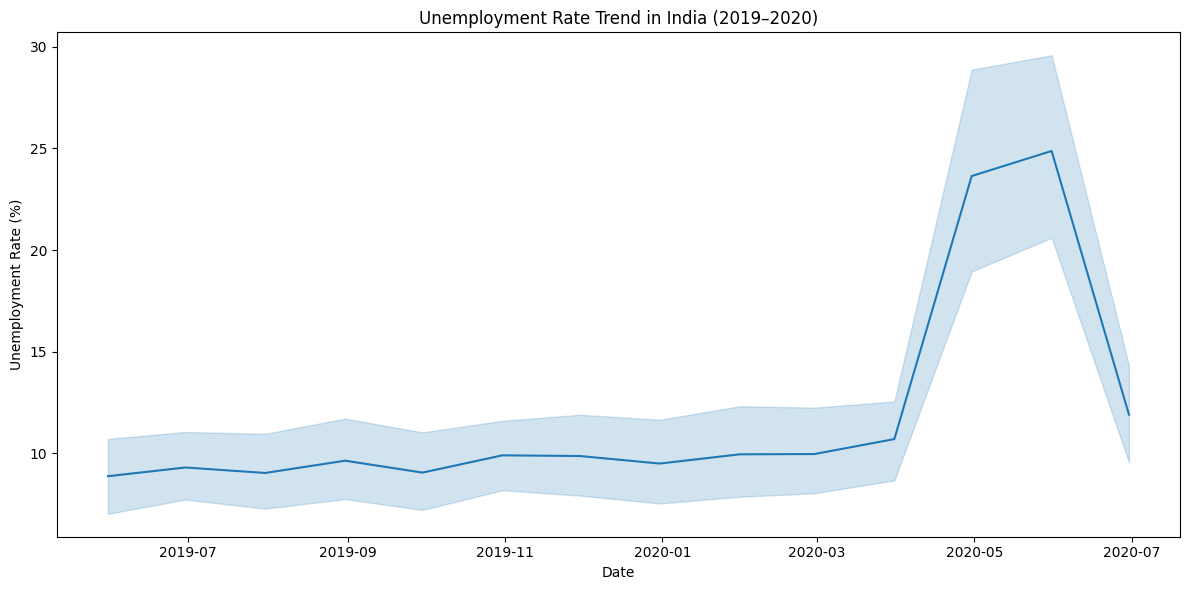

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate')
plt.title("Unemployment Rate Trend in India (2019–2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.savefig("../images/unemployment_trend.png")
plt.show()


##  Impact of Covid-19 on Unemployment

The Covid-19 pandemic and nationwide lockdowns had a major impact on employment.  
This section analyzes unemployment trends before and during the Covid-19 period.


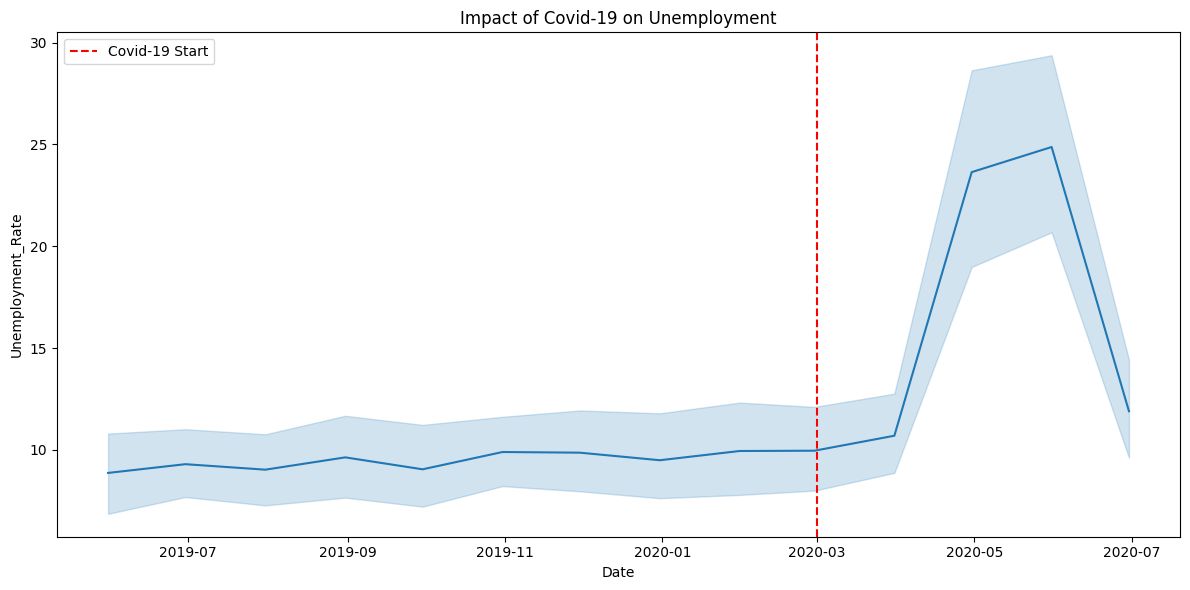

In [11]:
covid_start = pd.to_datetime("2020-03-01")

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate')
plt.axvline(covid_start, color='red', linestyle='--', label='Covid-19 Start')
plt.title("Impact of Covid-19 on Unemployment")
plt.legend()
plt.tight_layout()
plt.savefig("../images/covid_impact.png")
plt.show()


In [12]:
pre_covid = df[df['Date'] < covid_start]
during_covid = df[df['Date'] >= covid_start]

print("Average Pre-Covid Unemployment Rate:", round(pre_covid['Unemployment_Rate'].mean(), 2))
print("Average During-Covid Unemployment Rate:", round(during_covid['Unemployment_Rate'].mean(), 2))

Average Pre-Covid Unemployment Rate: 9.51
Average During-Covid Unemployment Rate: 17.77


##  Region-wise Unemployment Analysis

This section compares average unemployment rates across different regions in India.

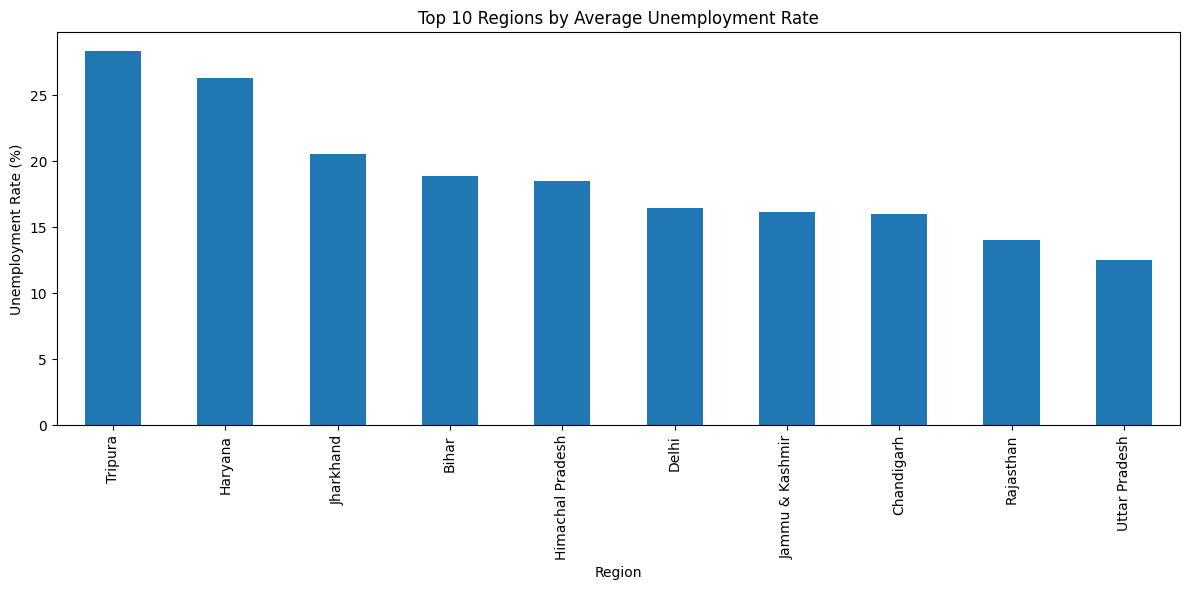

In [13]:
region_avg = df.groupby("Region")['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
region_avg.head(10).plot(kind='bar')
plt.title("Top 10 Regions by Average Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.savefig("../images/region_analysis.png")
plt.show()

##  Rural vs Urban Unemployment

This comparison highlights how unemployment levels differ between rural and urban areas.

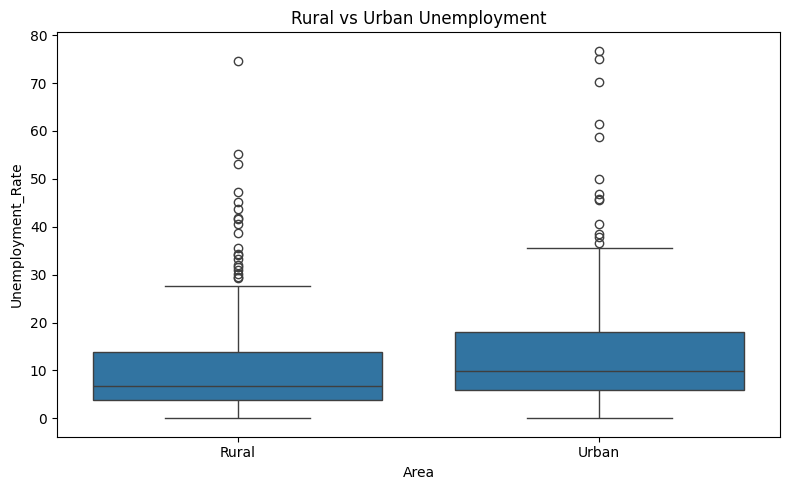

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Area', y='Unemployment_Rate')
plt.title("Rural vs Urban Unemployment")
plt.tight_layout()
plt.savefig("../images/rural_urban.png")
plt.show()

##  Seasonal Trend Analysis

Seasonal patterns are analyzed by observing month-wise average unemployment rates.


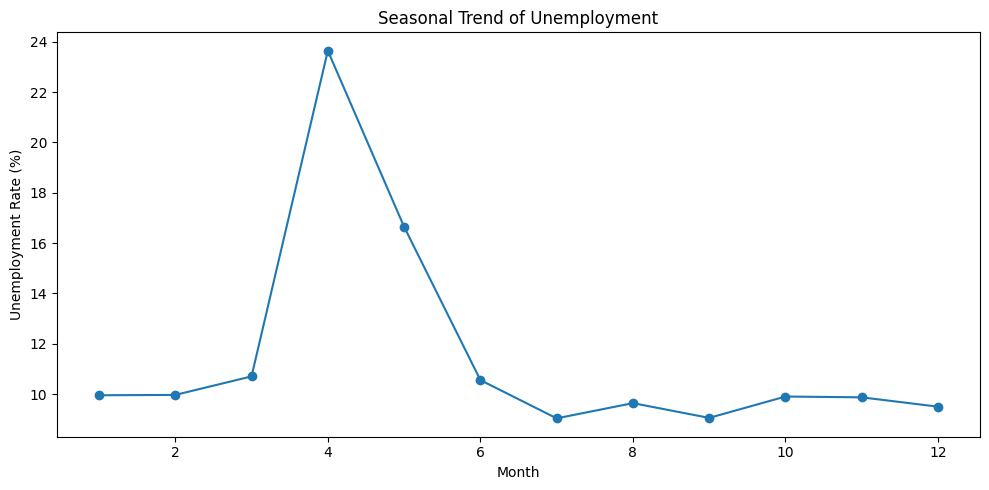

In [15]:
df['Month'] = df['Date'].dt.month

df.groupby('Month')['Unemployment_Rate'].mean().plot(marker='o', figsize=(10,5))
plt.title("Seasonal Trend of Unemployment")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

##  Key Findings

- Unemployment remained relatively stable before 2020 but increased sharply after March 2020.
- Urban areas experienced higher unemployment compared to rural areas.
- Certain regions consistently showed higher unemployment rates.
- Seasonal trends indicate the influence of agriculture and informal employment.

---

##  Impact of Covid-19

- Lockdowns caused a sudden spike in unemployment.
- Average unemployment during Covid-19 was significantly higher than pre-Covid levels.
- Labour participation declined during lockdown months.
- Gradual recovery was observed after restrictions were eased.

---

##  Policy Suggestions

- Implement emergency employment support during crises.
- Focus on urban informal workers and daily wage earners.
- Promote skill development and reskilling programs.
- Design region-specific employment policies.
- Strengthen digital job platforms for crisis resilience.

## Conclusion

This analysis demonstrates the significant impact of Covid-19 on unemployment in India.  
Data-driven insights such as these can help policymakers design resilient and inclusive economic strategies to handle future disruptions.
